### Predicting Health Insurance Premiums (based on customer charges). 


We are using a dataset that contains information about potential health insurance customers such as age, smoking history and bmi. We will use the 'cost' column to predict how much a potential customer may spend on health care needs. This spending trend could be used by health insurance companies to determine what an appropriate health insurance premium should be. 

In [37]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [38]:
#Load csv file into Pandas DataFrame
h_data = pd.read_csv("Resources/Health_insurance.csv")

#View DataFrame
h_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
#Check if DataFrame contains any null values
h_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [40]:
#Check DataFrame info
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


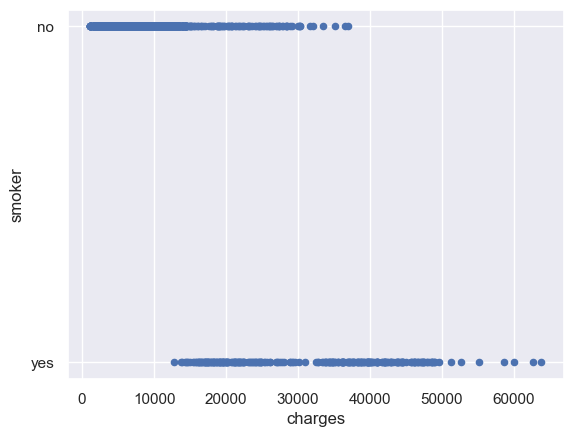

In [46]:
h_data.plot.scatter('charges', 'smoker')
plt.show()

In [5]:
#Get basic statistics on the dataframe
h_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#Explore sex column to see if male to female ratio is balanced
h_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

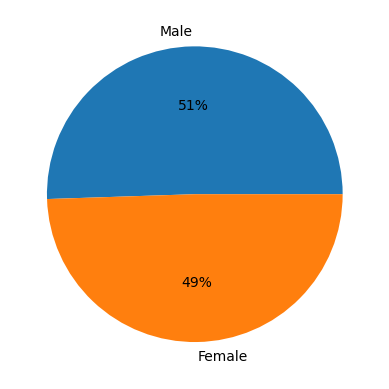

In [7]:
#Visualize Male and Female distribution
plt.pie(h_data['sex'].value_counts(), labels = ['Male', 'Female'], autopct='%.0f%%')
plt.show()

In [8]:
#Explore smoker column
h_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

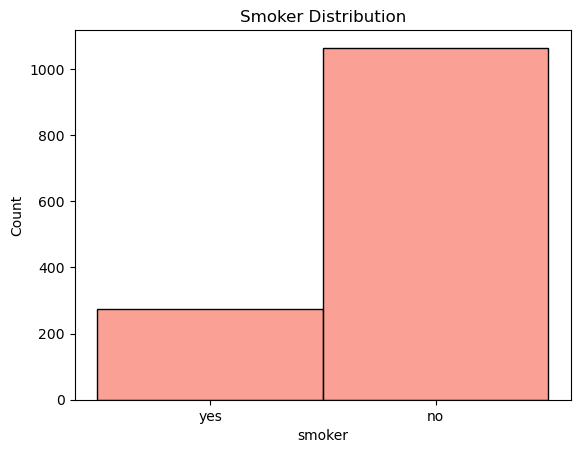

In [9]:
#Visualize smoker distribution
#Seaborn visualization
sns.histplot(h_data['smoker'], color='salmon').set(title = 'Smoker Distribution')
plt.show()

In [10]:
#Create some basic visuals using plotly.express to view some of the data
smoker_by_sex_chart = px.histogram(h_data, x = "smoker", color = "sex", title = "Number of Smokers")
smoker_by_sex_chart.show()

In [11]:
#Finding values of age column
h_data["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

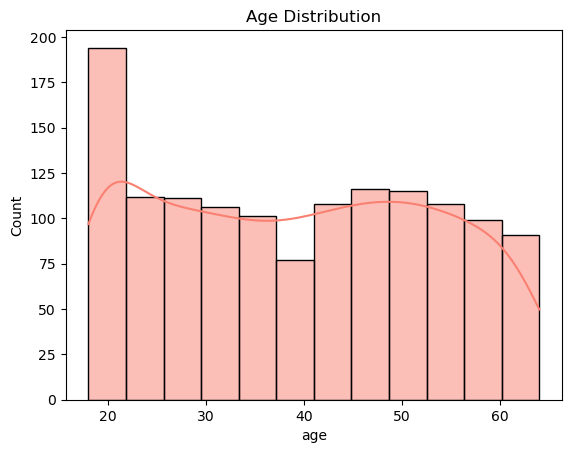

In [12]:
#Seaborn visualization
#Create a visual that shows the range of ages in the data set
sns.histplot(h_data['age'], kde=True, color='salmon').set(title = 'Age Distribution')
plt.show()

In [13]:
#Check use .describe() to see the range of values of the bmi column
h_data["bmi"].describe()
#From national institutes of health https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf
#"Normal" is 19-24, "Overweight" is 25-29, "Obese" is 30-39, "Extreme Obesity" is 40+

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

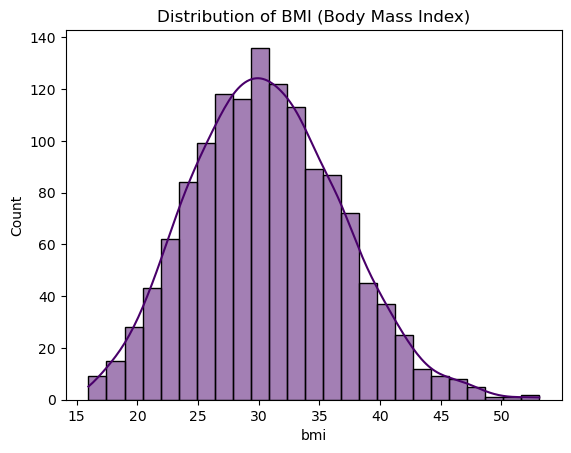

In [14]:
#Visual for the BMI distribution
sns.histplot(h_data['bmi'], kde=True, color='#49006a').set(title= 'Distribution of BMI (Body Mass Index)')
plt.show()

In [15]:
#Explore the number of kids column
h_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

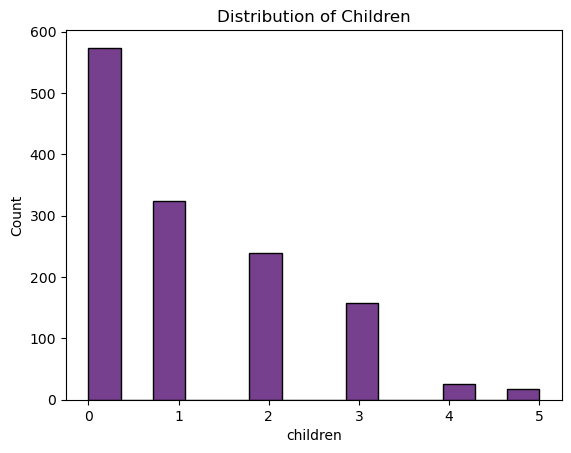

In [16]:
#Visual for the children distribution
sns.histplot(h_data['children'], color='#49006a').set(title= 'Distribution of Children')
plt.show()

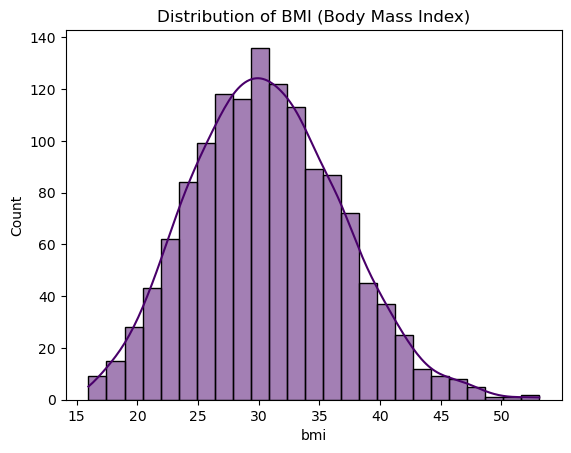

In [17]:
#Visual for the BMI distribution
sns.histplot(h_data['bmi'], kde=True, color='#49006a').set(title= 'Distribution of BMI (Body Mass Index)')
plt.show()

In [18]:
#This visual could also be a pie chart
pie_regions = h_data["region"].value_counts()
regions = pie_regions.index
population = pie_regions.values
pie = px.pie(h_data, values=population, names=regions, title = "Percentage of Customers by Region")
pie.show()

In [19]:
#Explore the 'charges' column (this is the column we are thinking about using as the target variable)
h_data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

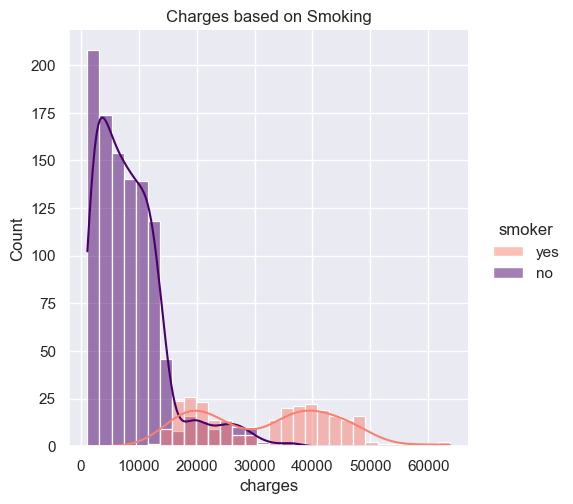

In [20]:
palette = ["salmon", '#49006a']
sns.set()
sns.displot(h_data, x='charges', hue='smoker',kde=True, palette=palette).set(title= 'Charges based on Smoking')
plt.show()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


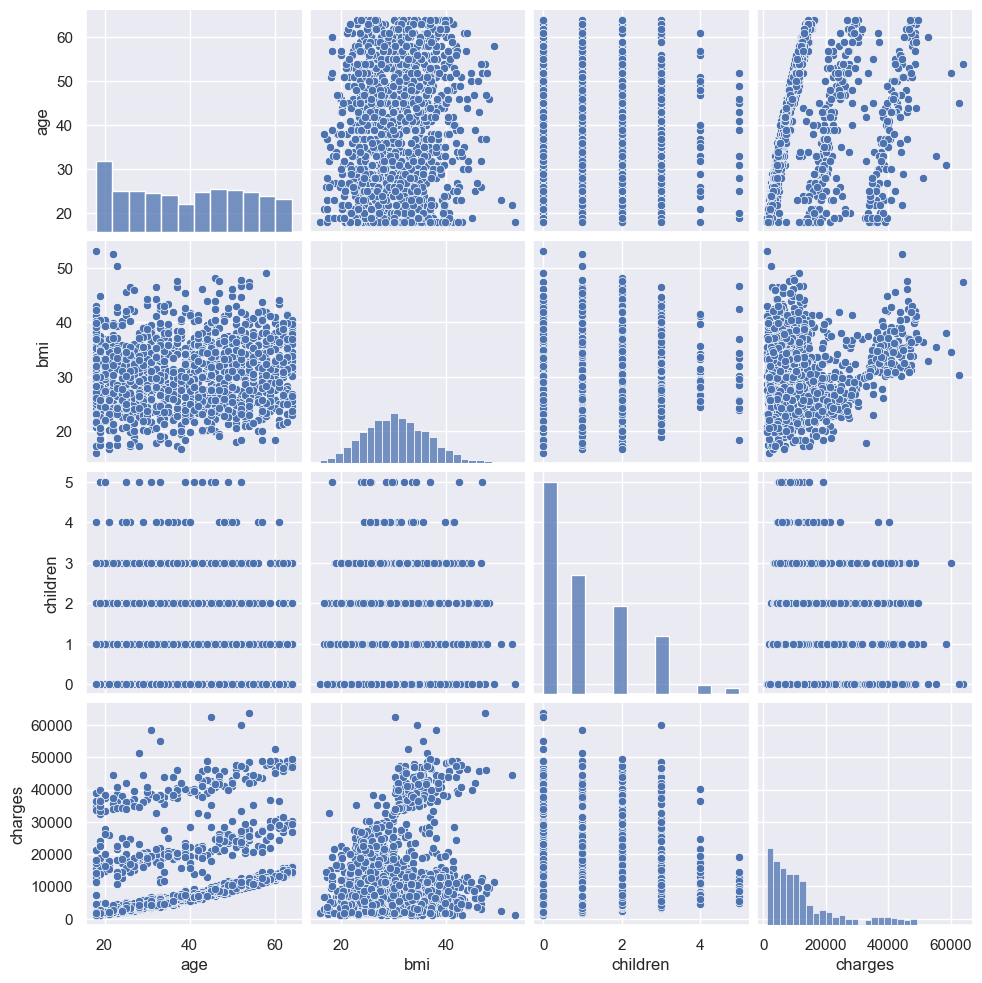

In [47]:
#Create a scatter matrix/pair plot with numeric data
print(h_data.columns)
numeric_features = ['age', 'bmi', 'children', 'charges']
sns.pairplot(h_data[numeric_features])
plt.show()

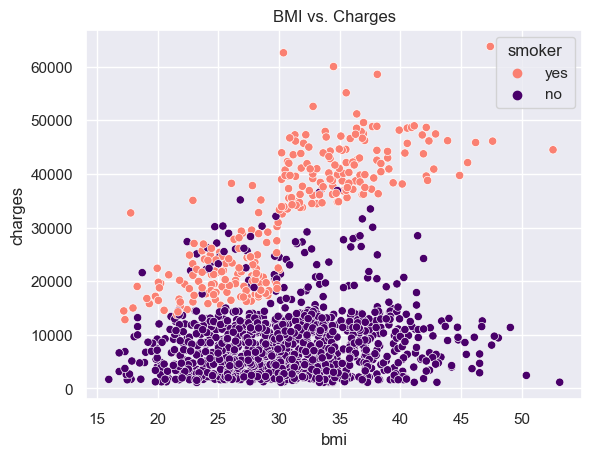

In [22]:
#bmi relationship to charges
palette = ["salmon", '#49006a']
sns.set()
sns.scatterplot(data= h_data, x='bmi', y='charges', hue='smoker', palette=palette).set(title= 'BMI vs. Charges')
plt.show()

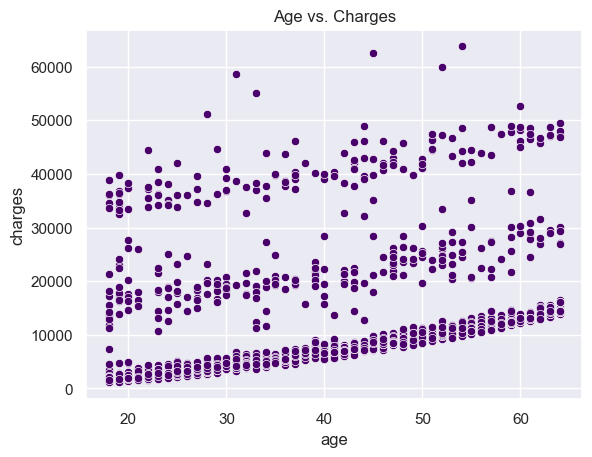

In [53]:
#bmi relationship to charges

sns.set()
sns.scatterplot(data= h_data, x='age', y='charges', color= '#49006a').set(title= 'Age vs. Charges')
plt.show()

In [23]:
#Change the 'male' and 'female' to numerical data in the 'sex' column 
h_data['sex'] = h_data['sex'].map({'female': 0, 'male': 1})

#Change the 'yes' and 'no' values to numerical data in the 'smoker' column
h_data['smoker'] = h_data['smoker'].map({'no': 0, 'yes': 1})

print(h_data.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [24]:
#Use get_dummies to convert categorical regions column to numeric
h_data = pd.get_dummies(h_data)
h_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Text(0.5, 1.0, 'Correlation Matrix')

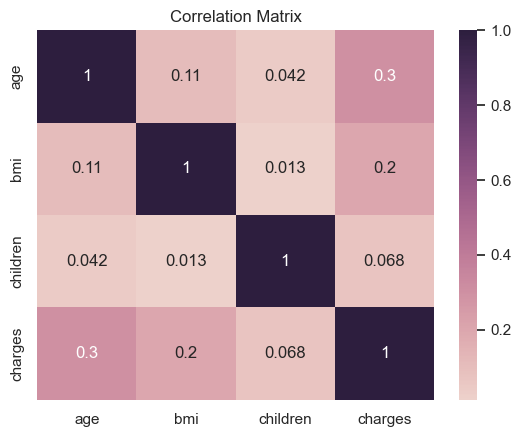

In [49]:
#Visualize correlations with Heatmap
sns.heatmap(h_data.corr(), annot= True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Correlation Matrix")

In [26]:
#Numerical correlation matrix
h_data.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [27]:
#Split data into training and test sets
X= h_data.copy()
X.drop('charges', axis=1, inplace=True)
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [28]:
#Define target vector
y = h_data["charges"].ravel()
y[:5]

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

In [29]:
#Split data using train_test_split
#Assign a random_state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)

(1070, 9)
(268, 9)


In [31]:
#Try Random Forest Regression Algorithm
forest = RandomForestRegressor(n_estimators=100, random_state=0)
#Fitting the model
forest = forest.fit(X_train, y_train)

In [32]:
#Making predictions using the testing data
predictions = forest.predict(X_test)

In [54]:
data = pd.DataFrame(data={"Actual Amount": y_test, "Predicted Amount": predictions})
data.head()

,Actual Amount,Predicted Amount
0,9095.06825,10210.815425
1,5272.17580,5448.365765
2,29330.98315,28130.082481
3,9301.89355,11196.426580
4,33750.29180,34899.608141


In [160]:
#Calculate feature importance
importances = forest.feature_importances_
#Sort features by their importance
sorted(zip(forest.feature_importances_, X.columns), reverse=True)

[(0.6107425698802152, 'smoker'),
 (0.20830480024964546, 'bmi'),
 (0.13465005728118928, 'age'),
 (0.02130218667956427, 'children'),
 (0.007202877904907075, 'sex'),
 (0.005955116801230998, 'region_northeast'),
 (0.005070459630982667, 'region_northwest'),
 (0.0038835443196403962, 'region_southeast'),
 (0.0028883872526247923, 'region_southwest')]

<AxesSubplot:title={'center':'Feature Importances'}, ylabel='1'>

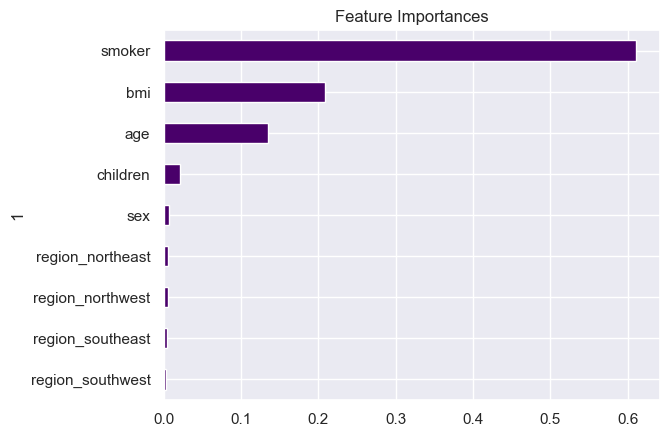

In [161]:
#Visualize the feature by importance
importances_df = pd.DataFrame(sorted(zip(forest.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='#49006a', title= 'Feature Importances', legend=False)

In [33]:
#Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

#Compute metrics
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
std = np.std(y_test)

# Print releveant metrics.
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The r2 is 0.8614100827216837.
The mean squared error is 21515908.855008416.
The root mean squared error is 4638.524426475344.
The standard deviation is 12459.884890791467.


In [163]:
#Compare actual with predicted values
compare = pd.DataFrame({"Actual": y_test[:,0], "Predicted": predictions.reshape(-1,1)[:,0]})
compare.head()

,Actual,Predicted
0,-0.353842,-0.283884
1,-0.672048,-0.655456
2,1.330534,1.230348
3,-0.336627,-0.170748
4,1.698384,1.795698


In [164]:
y_new = pd.DataFrame(y_test, columns =['y_new'])
y_new_inverse = st_Y.inverse_transform(y_new)

print("this is the inversed array:", y_new_inverse)

this is the inversed array: [[ 9095.06825 ]
 [ 5272.1758  ]
 [29330.98315 ]
 [ 9301.89355 ]
 [33750.2918  ]
 [ 4536.259   ]
 [ 2117.33885 ]
 [14210.53595 ]
 [ 3732.6251  ]
 [10264.4421  ]
 [18259.216   ]
 [ 7256.7231  ]
 [ 3947.4131  ]
 [46151.1245  ]
 [48673.5588  ]
 [44202.6536  ]
 [ 9800.8882  ]
 [42969.8527  ]
 [ 8233.0975  ]
 [21774.32215 ]
 [ 5080.096   ]
 [ 7441.501   ]
 [ 1256.299   ]
 [ 2755.02095 ]
 [11085.5868  ]
 [10923.9332  ]
 [12644.589   ]
 [18804.7524  ]
 [ 9715.841   ]
 [ 1131.5066  ]
 [15828.82173 ]
 [11842.62375 ]
 [ 2020.5523  ]
 [ 5693.4305  ]
 [ 2904.088   ]
 [ 7448.40395 ]
 [ 2597.779   ]
 [ 7337.748   ]
 [23887.6627  ]
 [38709.176   ]
 [ 4687.797   ]
 [ 2643.2685  ]
 [11674.13    ]
 [12124.9924  ]
 [ 4889.9995  ]
 [12333.828   ]
 [ 3579.8287  ]
 [ 4391.652   ]
 [42124.5153  ]
 [ 4463.2051  ]
 [13887.204   ]
 [ 1719.4363  ]
 [28476.73499 ]
 [ 1708.92575 ]
 [10594.2257  ]
 [25333.33284 ]
 [ 3645.0894  ]
 [38746.3551  ]
 [11848.141   ]
 [10564.8845  ]
 [13880.949 